# Quickstart
Here is a quick demonstration of some of the main functionality of Invert4Geom. This assumes you are familar with Python and have [successfully installed](install.md) this packaged. See the [tutorials](tutorial/index.md) for a step-by-step introduction to Invert4Geom, and the [how-to guides](how_to/index.md) for more in-depth guides for specific features.

## Import packages

In [3]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import verde as vd
from polartoolkit import utils as polar_utils

import invert4geom

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/sungw937/miniforge3/envs/invert4geom/lib/python3.12/site-packages/UQpy/__init__.py:6: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.



## Create observed gravity data

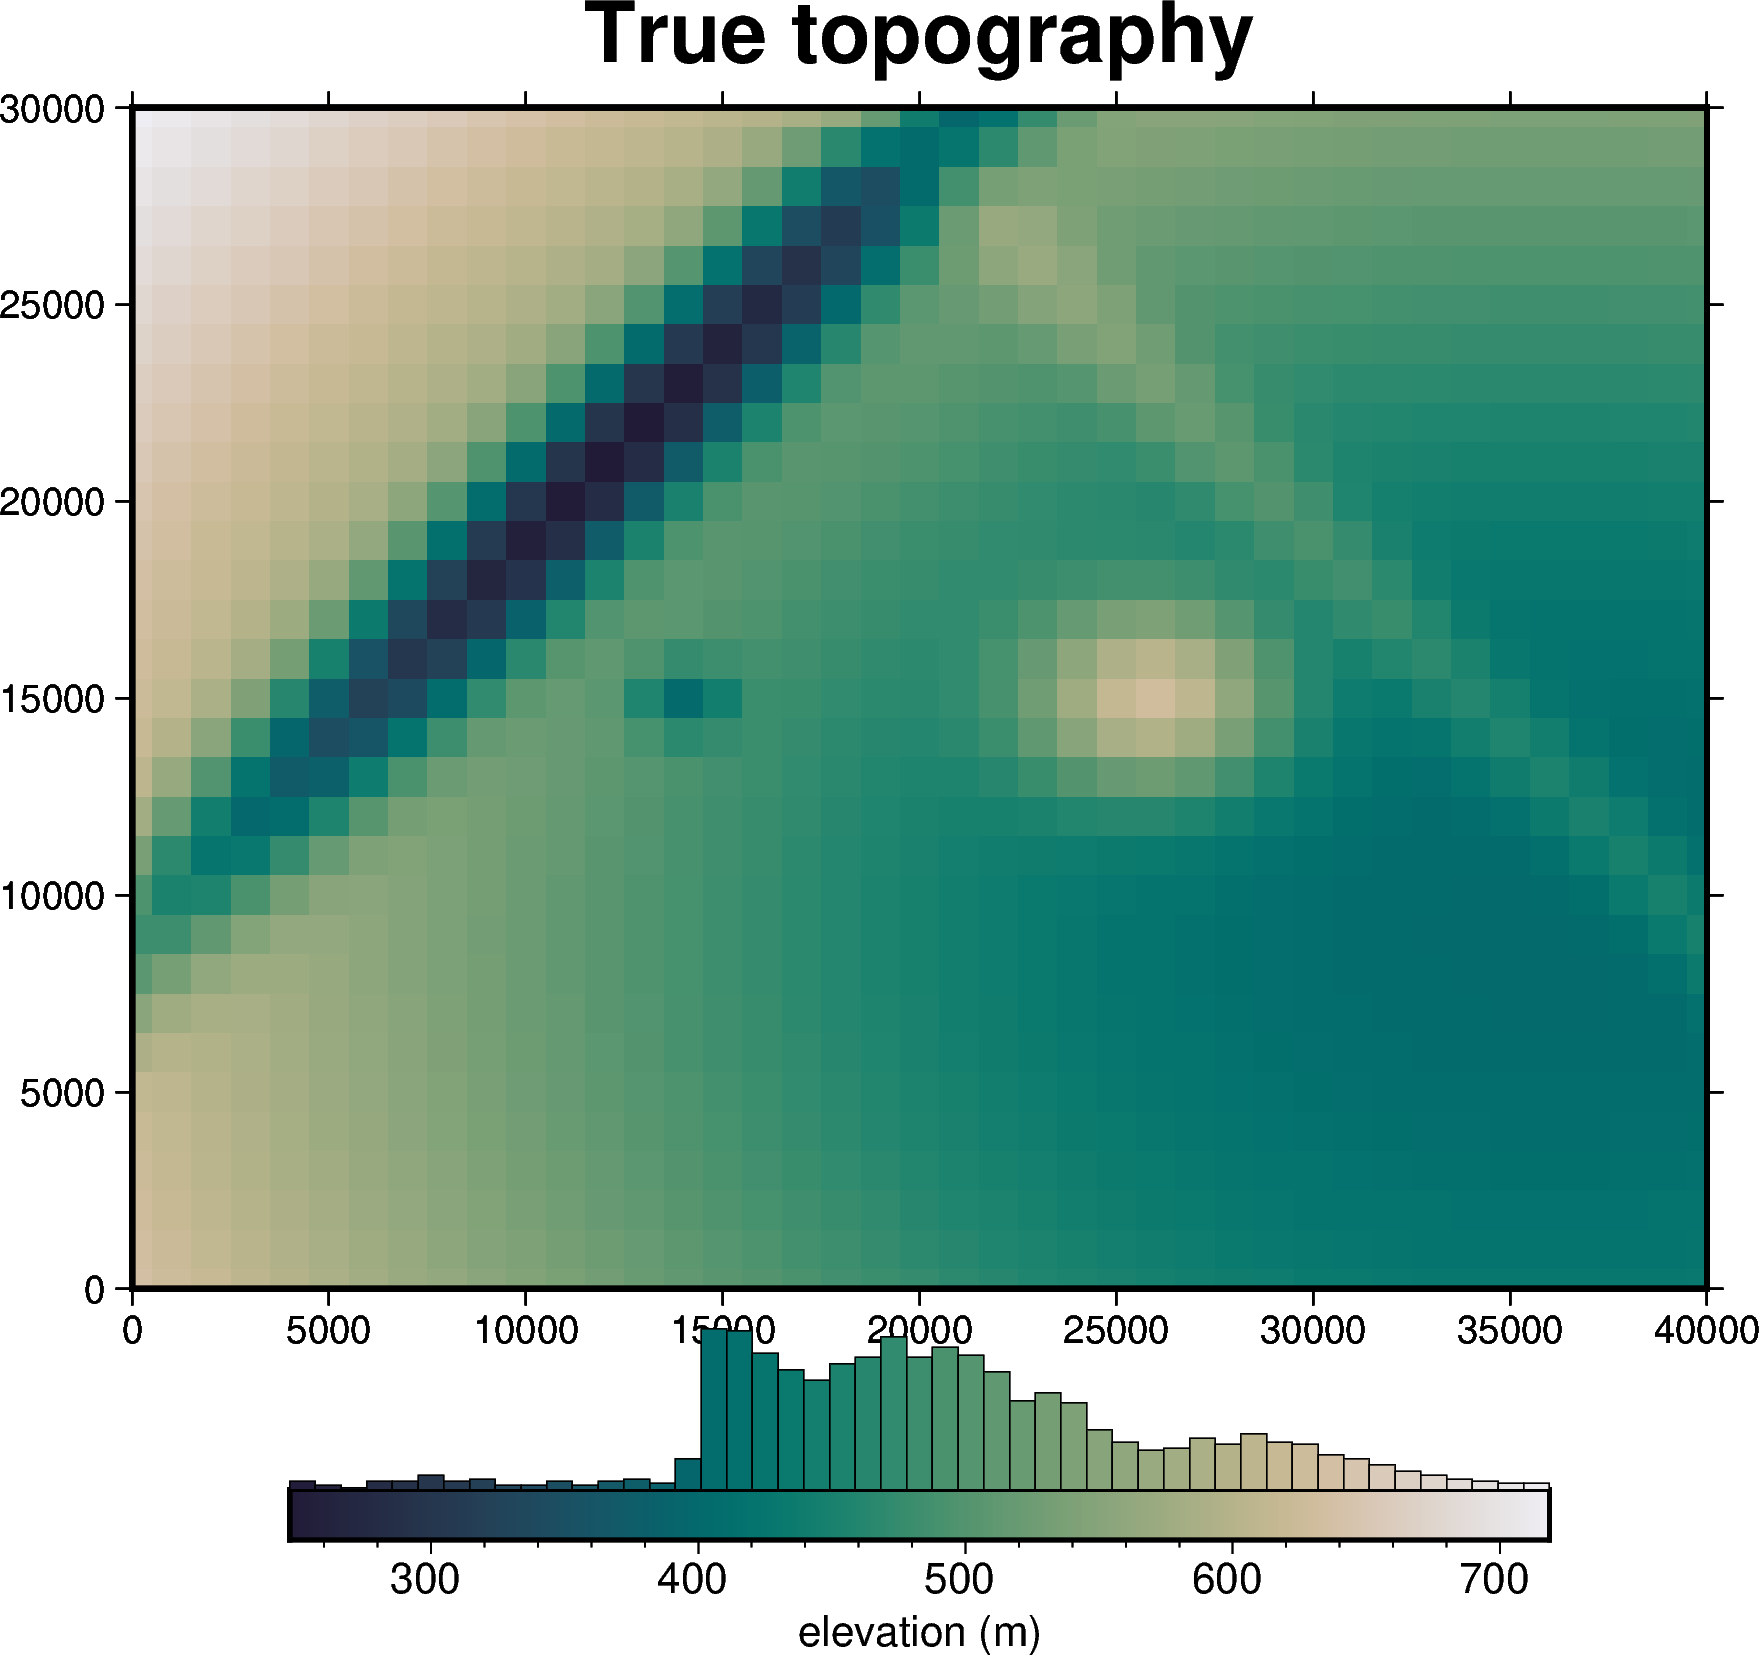

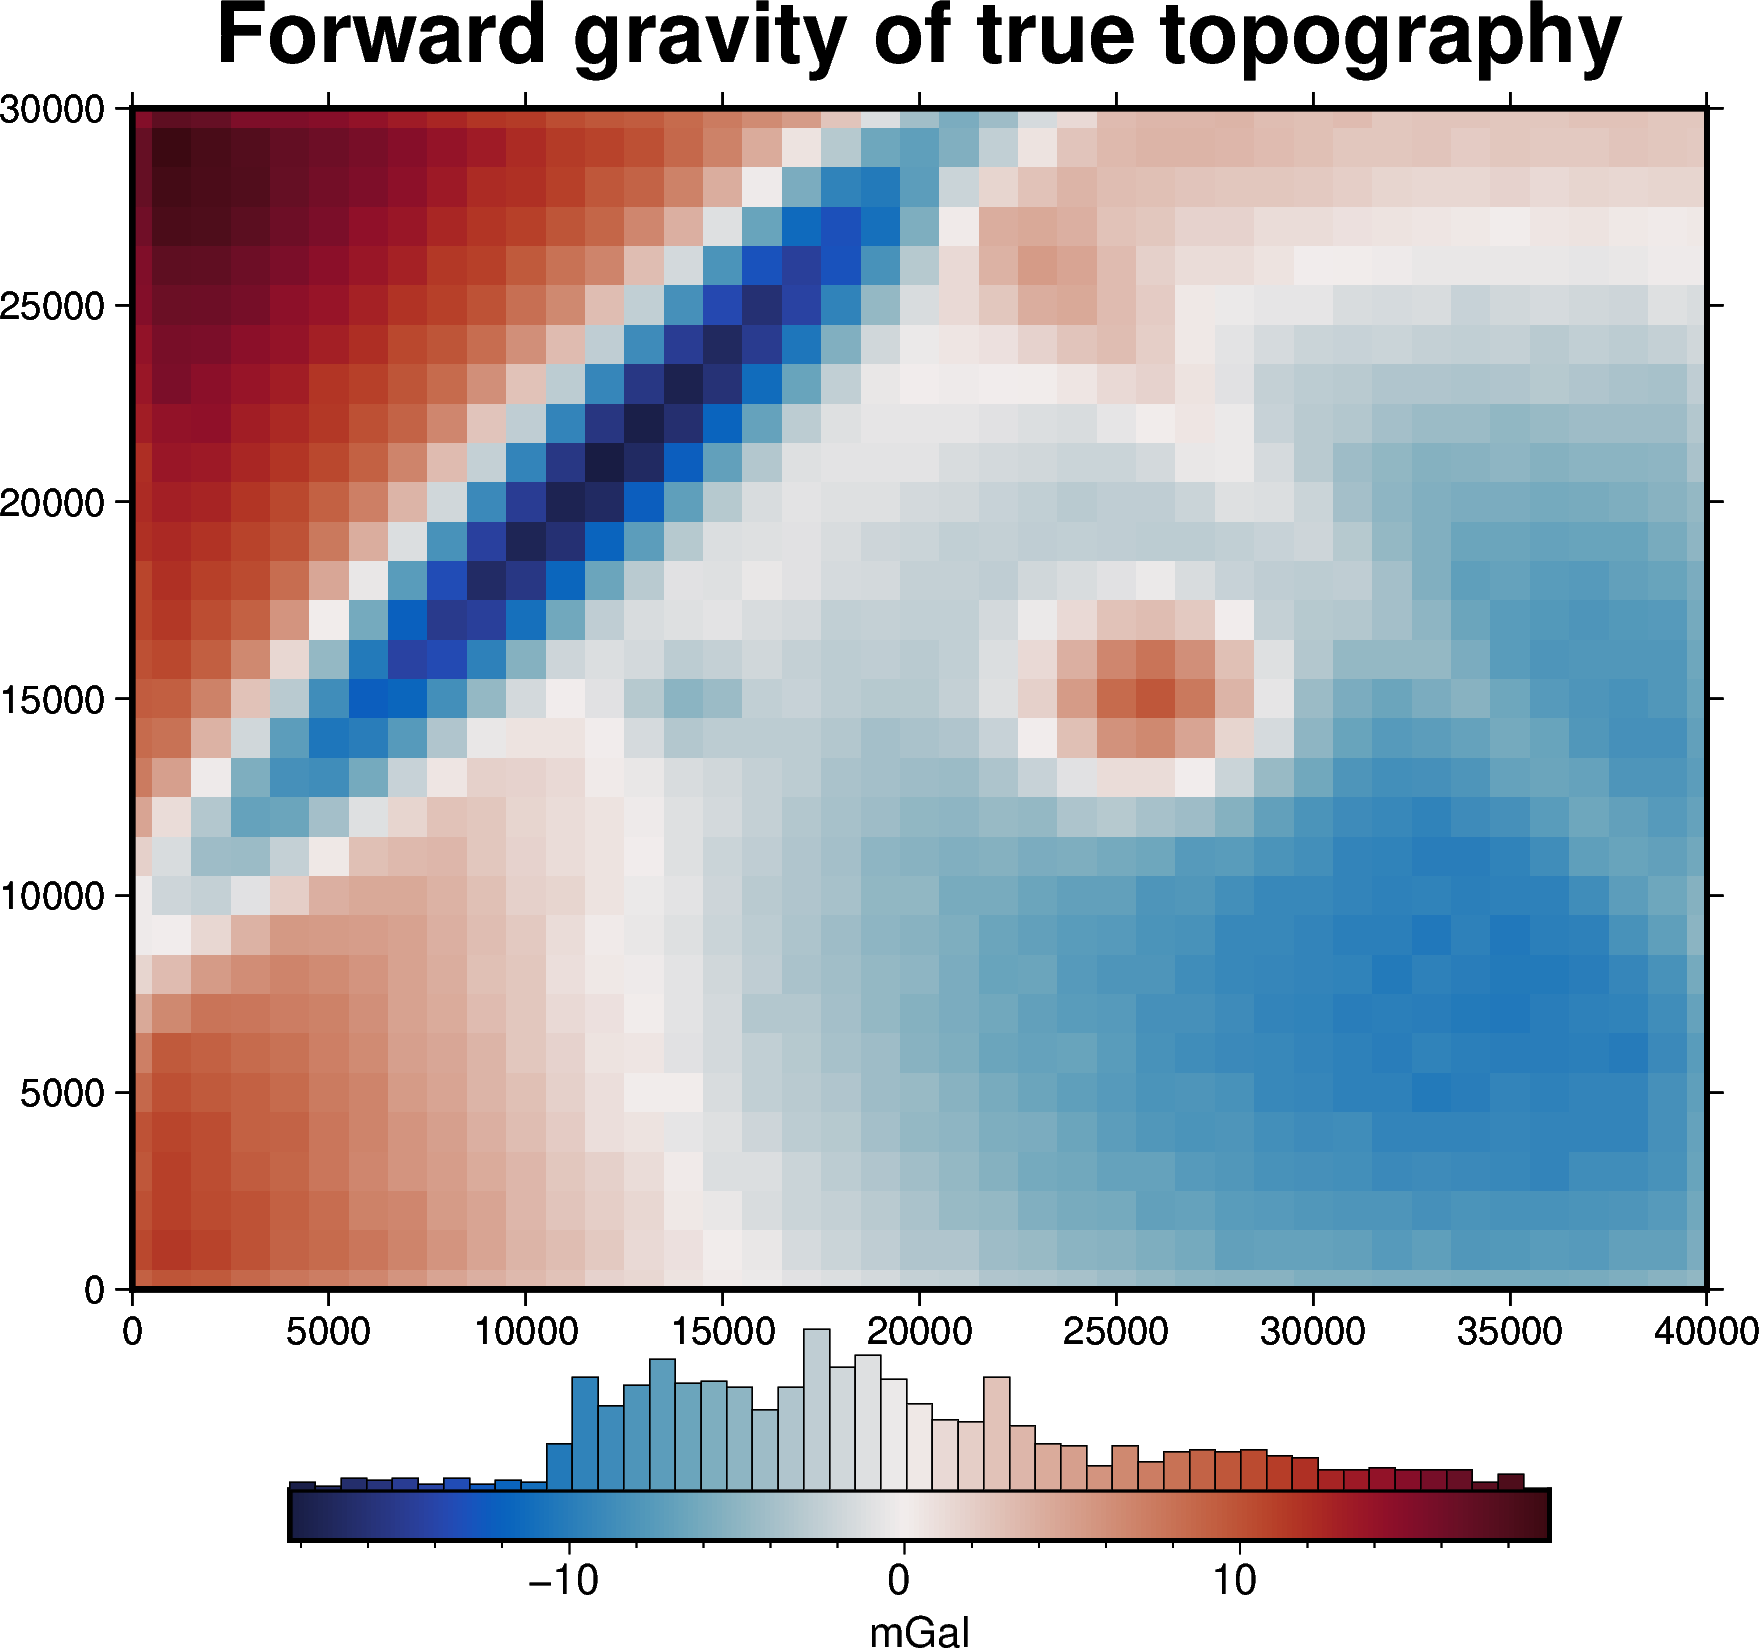

In [2]:
true_topography, _, _, observed_gravity = invert4geom.load_synthetic_model(
    spacing=1000,
    region=(0, 40000, 0, 30000),
    density_contrast=2670 - 1,  # density contrast between rock and air
    zref=500,
    gravity_noise=0.2,
    plot_gravity=True,
    plot_topography=True,
)

In [3]:
observed_gravity

<xarray.Dataset> Size: 21kB
Dimensions:          (northing: 31, easting: 41)
Coordinates:
  * northing         (northing) float64 248B 0.0 1e+03 2e+03 ... 2.9e+04 3e+04
  * easting          (easting) float64 328B 0.0 1e+03 2e+03 ... 3.9e+04 4e+04
Data variables:
    upward           (northing, easting) float64 10kB 1e+03 1e+03 ... 1e+03
    gravity_anomaly  (northing, easting) float64 10kB 9.07 9.813 ... 2.527 2.473

## Initialize the gravity data class

In [6]:
observed_gravity

<xarray.Dataset> Size: 21kB
Dimensions:          (northing: 31, easting: 41)
Coordinates:
  * northing         (northing) float64 248B 0.0 1e+03 2e+03 ... 2.9e+04 3e+04
  * easting          (easting) float64 328B 0.0 1e+03 2e+03 ... 3.9e+04 4e+04
Data variables:
    upward           (northing, easting) float64 10kB 1e+03 1e+03 ... 1e+03
    gravity_anomaly  (northing, easting) float64 10kB 9.07 9.813 ... 2.527 2.473

In [10]:
data = invert4geom.create_data(observed_gravity)

## Create a starting topography grid

In [11]:
# make a flat grid at 500 m
grid_coords = vd.grid_coordinates(
    spacing=1000,
    region=(0, 40000, 0, 30000),
)
starting_topography = vd.make_xarray_grid(
    grid_coords,
    data=np.ones_like(grid_coords[0]) * 500,
    data_names="upward",
)

## Create a Model

In [12]:
model = invert4geom.create_model(
    zref=500,
    density_contrast=2670 - 1,
    starting_topography=starting_topography,
)
model

<xarray.Dataset> Size: 92kB
Dimensions:                (northing: 31, easting: 41)
Coordinates:
  * easting                (easting) float64 328B 0.0 1e+03 ... 3.9e+04 4e+04
  * northing               (northing) float64 248B 0.0 1e+03 ... 2.9e+04 3e+04
    top                    (northing, easting) float64 10kB 500.0 ... 500.0
    bottom                 (northing, easting) float64 10kB 500.0 ... 500.0
Data variables:
    density                (northing, easting) int64 10kB 2669 2669 ... 2669
    thickness              (northing, easting) float64 10kB 0.0 0.0 ... 0.0 0.0
    starting_topography    (northing, easting) float64 10kB 500.0 ... 500.0
    topography             (northing, easting) float64 10kB 500.0 ... 500.0
    mask                   (northing, easting) float64 10kB 1.0 1.0 ... 1.0 1.0
    upper_confining_layer  (northing, easting) float64 10kB nan nan ... nan nan
    lower_confining_layer  (northing, easting) float64 10kB nan nan ... nan nan
Attributes:
    inner_region:      (0.0, 40000.0, 0.0, 30000.0)
    zref:              500
    density_contrast:  2669
    region:            (0.0, 40000.0, 0.0, 30000.0)
    spacing:           1000.0
    dataset_type:      model
    model_type:        prisms

## Gravity misfit


In [13]:
data.inv.starting_gravity(
    model,
    progressbar=True,
)

  0%|          | 0/1271 [00:00<?, ?it/s]

In [14]:
data.inv.regional_separation(
    method="constant",
    constant=0,
)

<xarray.Dataset> Size: 102kB
Dimensions:           (northing: 31, easting: 41)
Coordinates:
  * northing          (northing) float64 248B 0.0 1e+03 2e+03 ... 2.9e+04 3e+04
  * easting           (easting) float64 328B 0.0 1e+03 2e+03 ... 3.9e+04 4e+04
Data variables:
    upward            (northing, easting) float64 10kB 1e+03 1e+03 ... 1e+03
    gravity_anomaly   (northing, easting) float64 10kB 9.07 9.813 ... 2.473
    starting_gravity  (northing, easting) float64 10kB -0.0 -0.0 ... -0.0 -0.0
    forward_gravity   (northing, easting) float64 10kB -0.0 -0.0 ... -0.0 -0.0
    misfit            (northing, easting) float64 10kB 9.07 9.813 ... 2.473
    reg               (northing, easting) float64 10kB 0.0 0.0 0.0 ... 0.0 0.0
    res               (northing, easting) float64 10kB 9.07 9.813 ... 2.473
    starting_misfit   (northing, easting) float64 10kB 9.07 9.813 ... 2.473
    starting_reg      (northing, easting) float64 10kB 0.0 0.0 0.0 ... 0.0 0.0
    starting_res      (northing, easting) float64 10kB 9.07 9.813 ... 2.473
Attributes:
    region:        (0.0, 40000.0, 0.0, 30000.0)
    spacing:       1000.0
    buffer_width:  3000.0
    inner_region:  (3000.0, 37000.0, 3000.0, 27000.0)
    dataset_type:  data
    model_type:    prisms

makecpt [ERROR]: Option T: min >= max
supplied min value is greater or equal to max value
Grid/points are a constant value, can't make a colorbar histogram!
makecpt [ERROR]: Option T: min >= max
supplied min value is greater or equal to max value
Grid/points are a constant value, can't make a colorbar histogram!


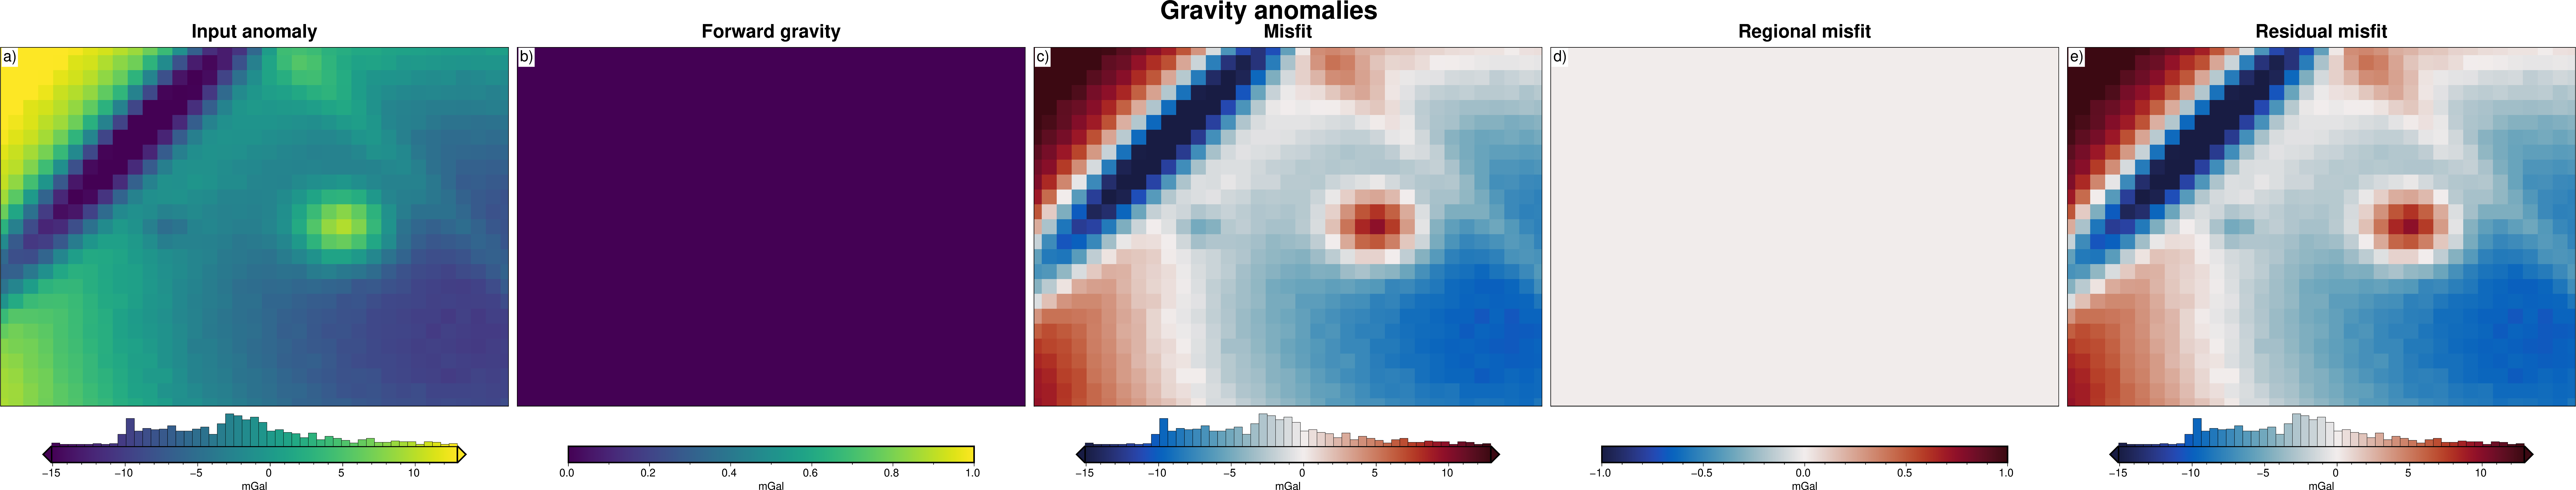

In [15]:
data.inv.plot_anomalies()

## Initialize the Inversion class

In [16]:
inv = invert4geom.Inversion(
    data,
    model,
    solver_damping=0.1,
    # set stopping criteria
    max_iterations=30,
    l2_norm_tolerance=0.45,
    delta_l2_norm_tolerance=1.005,
)

## Perform inversion

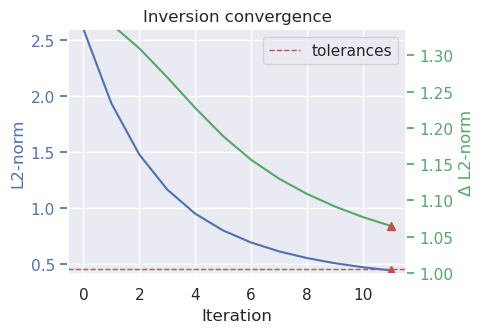

In [17]:
inv.invert(
    plot_dynamic_convergence=True,
)

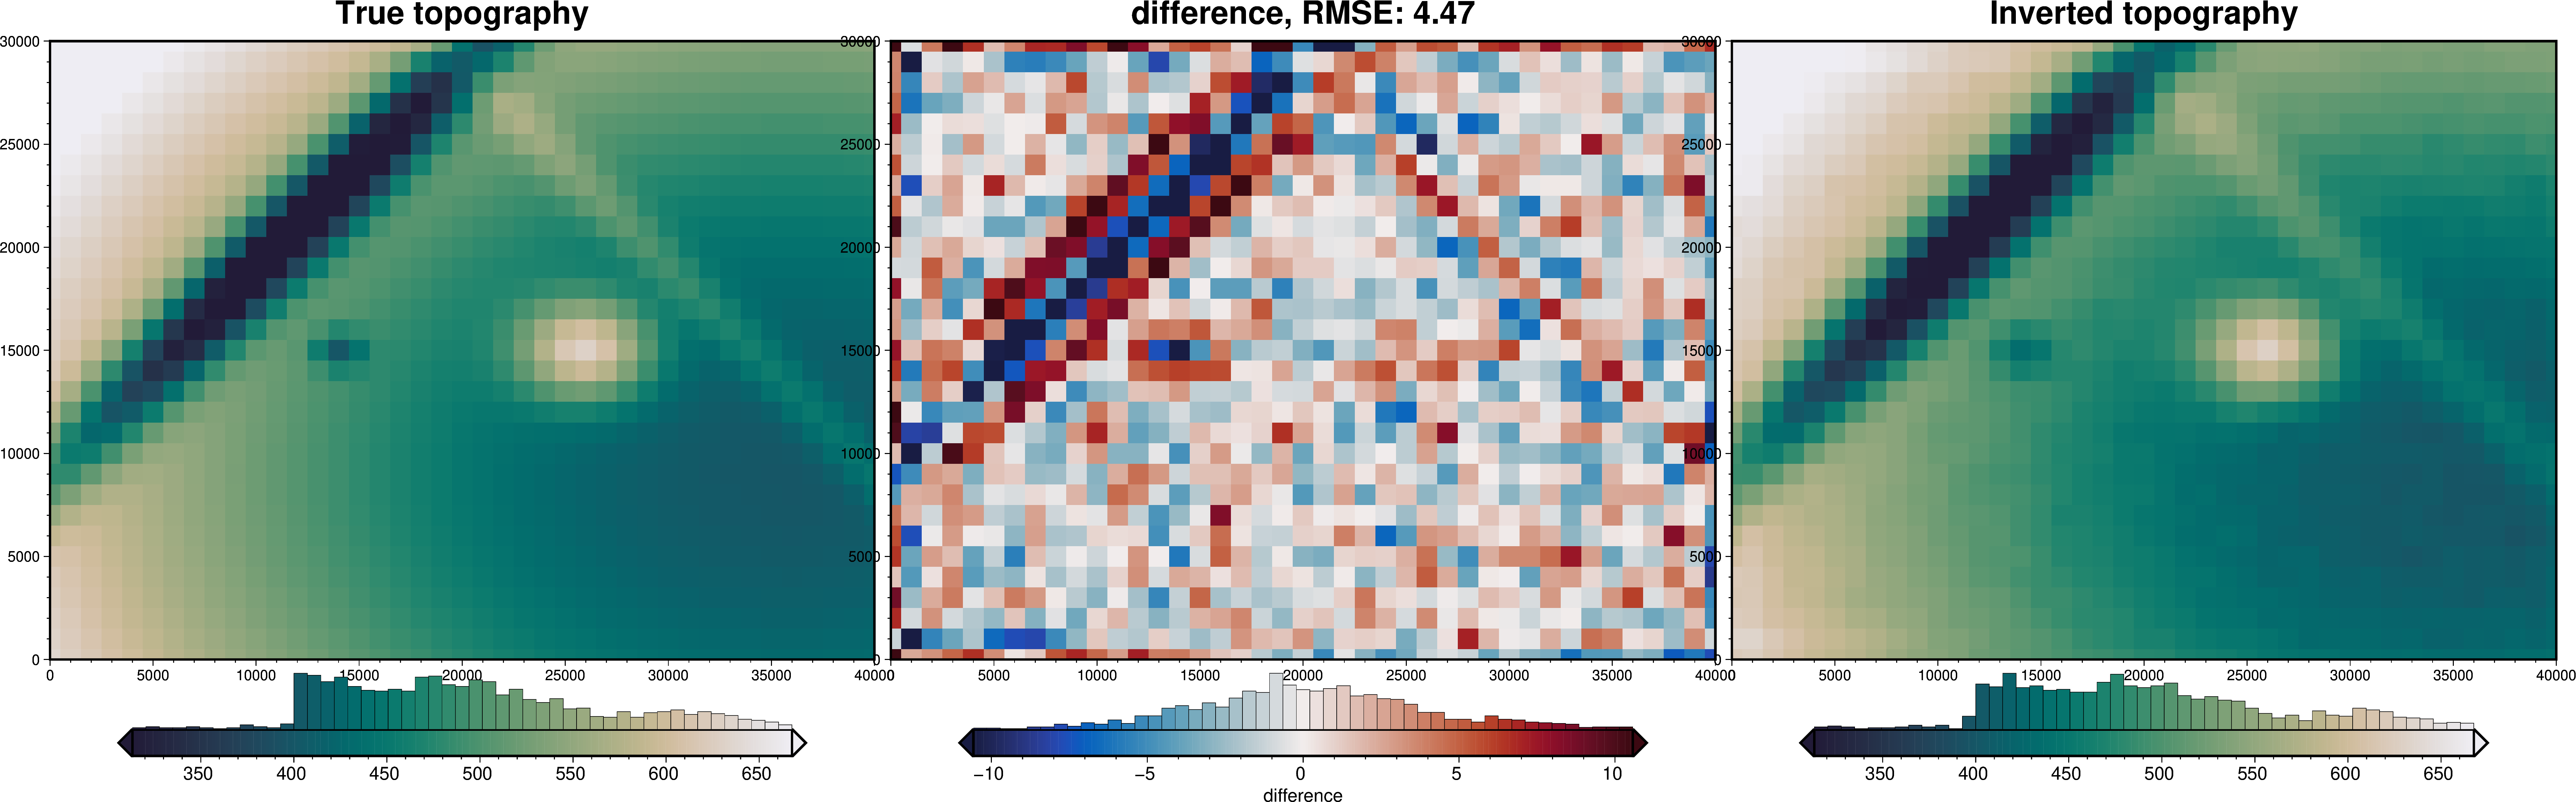

In [18]:
_ = polar_utils.grd_compare(
    true_topography,
    inv.model.topography,
    grid1_name="True topography",
    grid2_name="Inverted topography",
    robust=True,
    hist=True,
    inset=False,
    title="difference",
    grounding_line=False,
    reverse_cpt=True,
    cmap="rain",
    frame=True,
)

As you can see, the inversion successfully recovered the true topography. The root mean square difference between the true and recovered topography is low, but this is not too surprising since we gave the inversion the true density contrast and reference level values.